## Surprise Housing Case Study

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


from sklearn.model_selection import train_test_split


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get Data
housing_data = pd.read_csv('/Users/4239114/Downloads/ML and AI course/Logistic Regression/Logistic Regression Assignment/train.csv',encoding = 'latin')
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Understanding the data

In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
housing_data.shape

(1460, 81)

In [5]:
# Let's get the description of the dataset
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housing_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# !pip install sweetviz

In [8]:
# !pip install --upgrade pip

In [9]:
#Auto EDA
import sweetviz as sv
sweet_report = sv.analyze(housing_data,pairwise_analysis="off")
sweet_report.show_html('housing_data_report.html')

Feature: SalePrice                           |█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| [100%]   00:22 -> (00:00 left)


Report housing_data_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [10]:
# let's check for null values in categorical columns
housing_data.select_dtypes(include='object').isnull().sum()[housing_data.select_dtypes(include='object').isnull().sum()>0]


Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

As per the description text document few columns have 'NA' value present which actually symbolises somethings, let's replace those with 'None' and see the actual null count

In [11]:
for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 
            'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    housing_data[col]=housing_data[col].fillna('None')

In [12]:
# let's check for null values in all categorical columns again
housing_data.select_dtypes(include='object').isnull().sum()[housing_data.select_dtypes(include='object').isnull().sum()>0]


Series([], dtype: int64)

We can remove categorical sets that have more than 85% data associated to one value as these columns would be skewed
  to one value

In [13]:
#get 85% of the total rows
val = (85*housing_data.shape[0])/100

In [14]:
val

1241.0

In [15]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getCategoricalValueCounts():
    column = []
    cat_col = housing_data.select_dtypes(include=['object'])
    for col in (cat_col):
        if(housing_data[col].value_counts().max() >= val):
            column.append(col)
    return column

columnsRemoved = getCategoricalValueCounts()

# Remove the columns with skewed data

housing_data.drop(columnsRemoved, axis = 1, inplace = True)

In [16]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


Let's do the same thing with numeric columns

In [17]:
# let's  check the null values in the numerical data
housing_data.select_dtypes(include=['int64','float']).isnull().sum()[housing_data.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [18]:
# Here we can fill null values for column LotFrontage and MasVnrArea with median as these are numeric type and mull count isn't much
housing_data['LotFrontage'] = housing_data['LotFrontage'].replace(np.nan, housing_data['LotFrontage'].median())
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].replace(np.nan, housing_data['MasVnrArea'].median())

In [19]:
# Now put null values with 0 for GarageYrBlt for now as this represents year where median doesn't effects

housing_data['GarageYrBlt']=housing_data['GarageYrBlt'].fillna(0)
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].astype(int)

### Creating new columns for easier understanding of data

In [20]:
# A new column named IfRemodelled - This column would determine whether the house has been remodelled or not based on the difference between remodelled and built years

def checkRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housing_data['IfRemodelled'] = housing_data.apply(checkRemodel, axis=1)
housing_data.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IfRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [21]:
# A new column named BuiltAge and determine the age of the building at the time of selling

def getBuiltAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housing_data['BuiltAge'] = housing_data.apply( getBuiltAge, axis=1)
housing_data.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IfRemodelled,BuiltAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [22]:
# A new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housing_data['OldOrNewGarage'] = housing_data['GarageYrBlt'].apply(getGarageConstructionPeriod)
housing_data.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IfRemodelled,BuiltAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [23]:
# As we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as derived columns can be used further

housing_data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

We can again remove numerical sets that have more than 85% data associated to one value as these columns would be skewed
  to one value

In [24]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getNumericalValueCounts():
    column = []
    num_col = housing_data.select_dtypes(include=['int64', 'float'])
    for col in (num_col):
        if(housing_data[col].value_counts().max() >= val):
            column.append(col)
    return column

columnsRemoved = getNumericalValueCounts()

# Remove the columns with skewed data

housing_data.drop(columnsRemoved, axis = 1, inplace = True)

In [25]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,IfRemodelled,BuiltAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,548,0,61,None,2,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,460,298,0,None,5,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,608,0,42,None,9,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,642,0,35,None,2,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,836,192,84,None,12,Normal,250000,0,8,1


In [26]:
# let's check for percentage of null values in each column

percent_missing = round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)
print(percent_missing)


Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage       0.0
LotArea           0.0
LotShape          0.0
LotConfig         0.0
Neighborhood      0.0
BldgType          0.0
HouseStyle        0.0
OverallQual       0.0
OverallCond       0.0
RoofStyle         0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType        0.0
MasVnrArea        0.0
ExterQual         0.0
Foundation        0.0
BsmtQual          0.0
BsmtExposure      0.0
BsmtFinType1      0.0
BsmtFinSF1        0.0
BsmtUnfSF         0.0
TotalBsmtSF       0.0
HeatingQC         0.0
1stFlrSF          0.0
2ndFlrSF          0.0
GrLivArea         0.0
BsmtFullBath      0.0
FullBath          0.0
HalfBath          0.0
BedroomAbvGr      0.0
KitchenQual       0.0
TotRmsAbvGrd      0.0
Fireplaces        0.0
FireplaceQu       0.0
GarageType        0.0
GarageFinish      0.0
GarageCars        0.0
GarageArea        0.0
WoodDeckSF        0.0
OpenPorchSF       0.0
Fence             0.0
MoSold            0.0
SaleCondit

### Let's Check for Duplicates

In [27]:
# Check for duplicate values in the dataset

housing_data[housing_data.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,IfRemodelled,BuiltAge,OldOrNewGarage


0 duplicates found

### Treat Outliers

In [28]:
# Checking outliers at 25%,50%,75%,90%,95% and above

housing_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,IfRemodelled,BuiltAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,0.613014,1.767123,472.980137,94.244521,46.660274,6.321918,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,0.644666,0.747315,213.804841,125.338794,66.256028,2.703626,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,1.000000,334.500000,0.000000,0.000000,5.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,1.000000,2.000000,480.000000,0.000000,25.000000,6.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,1.000000,2.000000,576.000000,168.000000,68.000000,8.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,1.000000,3.000000,757.100000,262.000000,130.000000,10.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,2.000000,3.000000,850.100000,335.000000,175.050000,11.000000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,2.000000,3.000000,1002.790000,505.460000,285.820000,12.000000,442567.010000,1.000000,60.000000,1.000000


##### Check the outliers in all the numeric columns


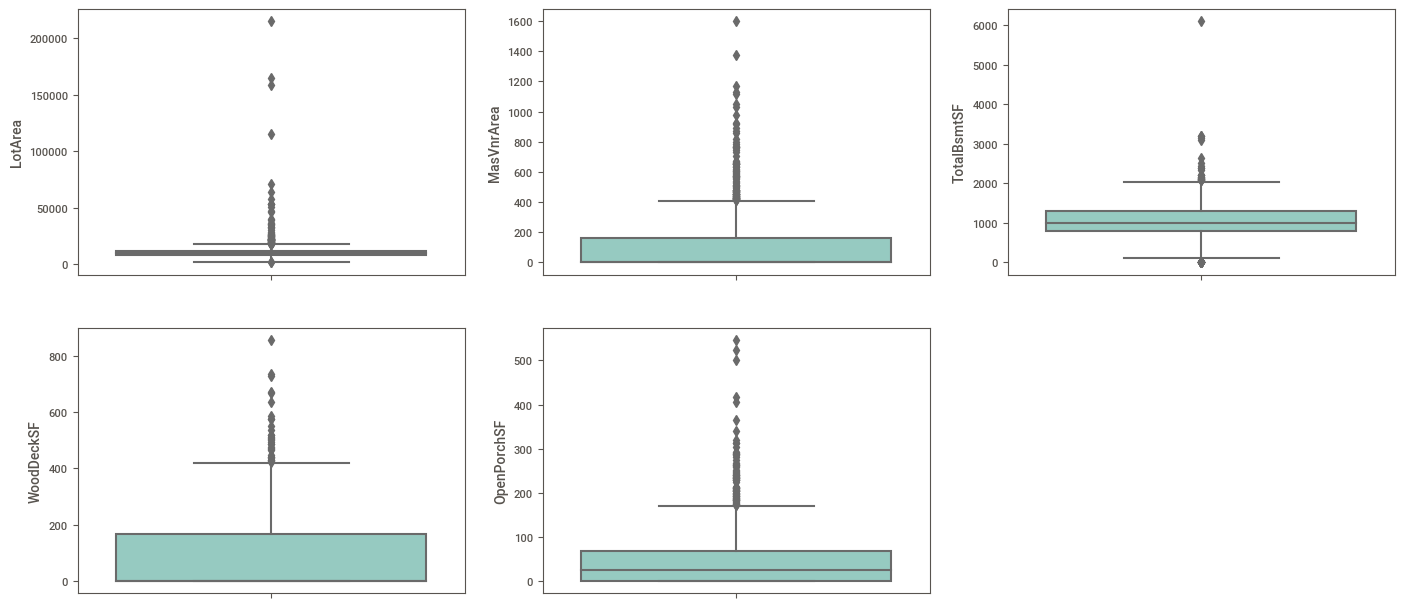

In [29]:

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = housing_data)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = housing_data)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = housing_data)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = housing_data)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housing_data)
plt.show()

#####  Removing Outliers

In [30]:


# Removing values beyond 98% for LotArea

LotArea_quartile = housing_data['LotArea'].quantile(0.98)
housing_data = housing_data[housing_data["LotArea"] < LotArea_quartile]

# Removing values beyond 98% for MasVnrArea

MasVnrArea_quartile = housing_data['MasVnrArea'].quantile(0.98)
housing_data = housing_data[housing_data["MasVnrArea"] < MasVnrArea_quartile]

# Removing values beyond 99% for TotalBsmtSF

TotalBsmtSF_quartile = housing_data['TotalBsmtSF'].quantile(0.99)
housing_data = housing_data[housing_data["TotalBsmtSF"] < TotalBsmtSF_quartile]

# Removing values beyond 99% for WoodDeckSF

WoodDeckSF_quartile = housing_data['WoodDeckSF'].quantile(0.99)
housing_data = housing_data[housing_data["WoodDeckSF"] < WoodDeckSF_quartile]

# Removing values beyond 99% for OpenPorchSF

OpenPorchSF_quartile = housing_data['OpenPorchSF'].quantile(0.99)
housing_data = housing_data[housing_data["OpenPorchSF"] < OpenPorchSF_quartile]

In [31]:
# Dropping ID Column as it's not required
housing_data = housing_data.drop(['Id'], axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageArea,WoodDeckSF,OpenPorchSF,Fence,MoSold,SaleCondition,SalePrice,IfRemodelled,BuiltAge,OldOrNewGarage
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,548,0,61,None,2,Normal,208500,0,5,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,460,298,0,None,5,Normal,181500,0,31,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,608,0,42,None,9,Normal,223500,1,6,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,642,0,35,None,2,Abnorml,140000,1,36,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,836,192,84,None,12,Normal,250000,0,8,1


In [32]:
num_data = round(100*(len(housing_data)/1460),2)
print(num_data)

93.01


Percentage of data retained is 93.01

### Data Visualisation

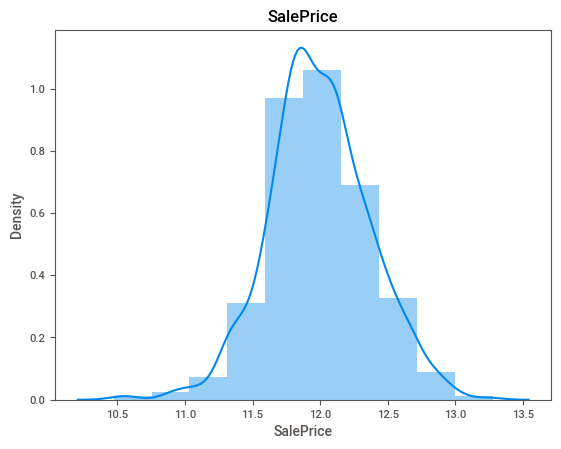

In [33]:
# Visualise the target variable -> SalePrice after transforming the sales price

housing_data['SalePrice'] = np.log1p(housing_data['SalePrice'])

plt.title('SalePrice')
sns.distplot(housing_data['SalePrice'], bins=10)
plt.show()


<Figure size 1000x500 with 0 Axes>

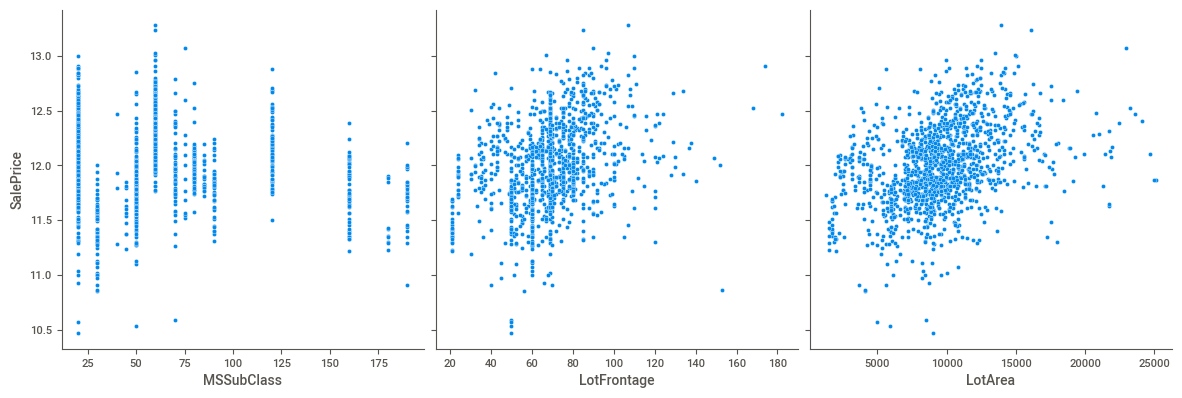

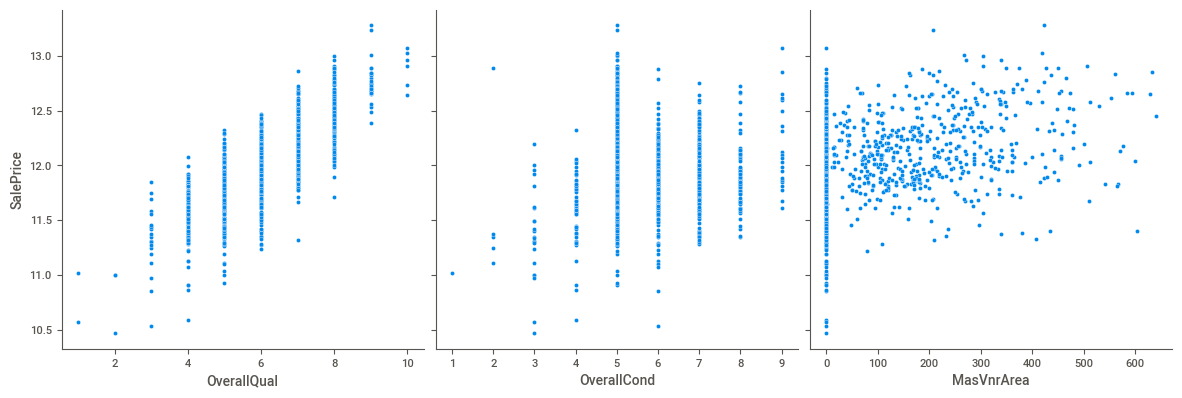

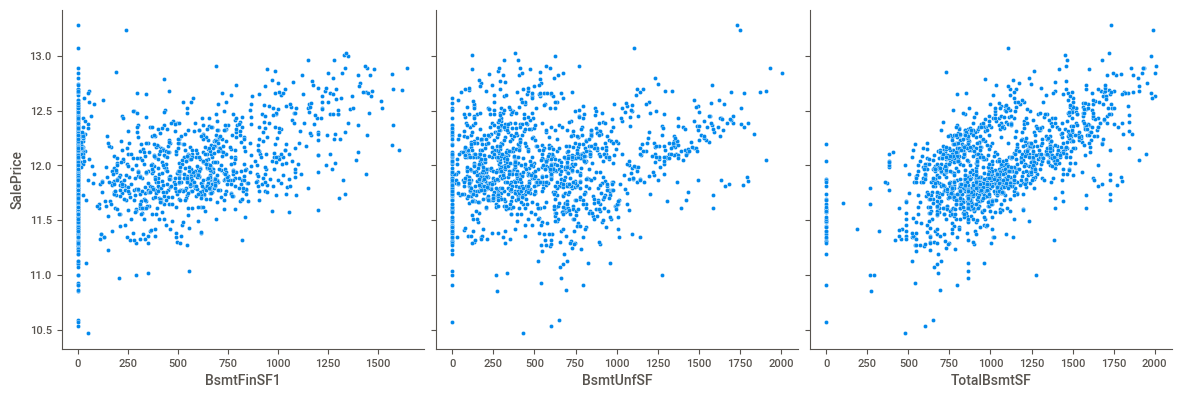

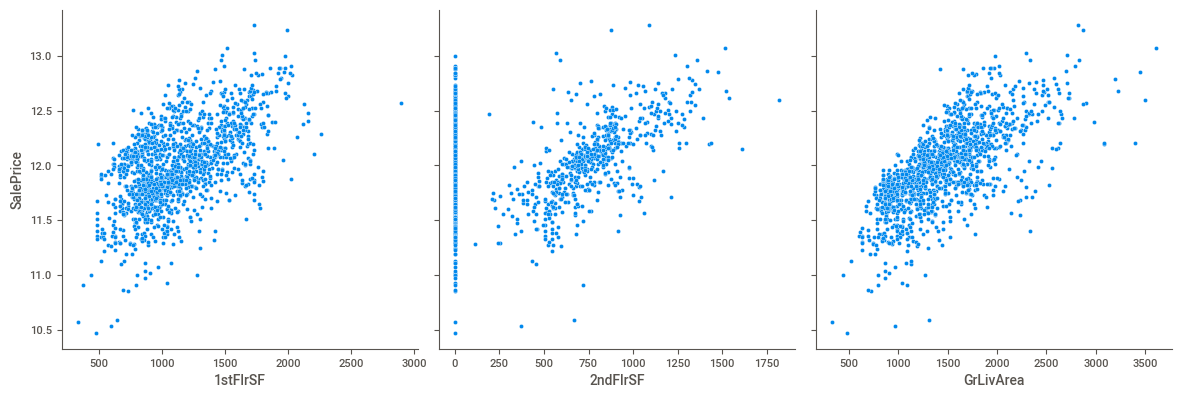

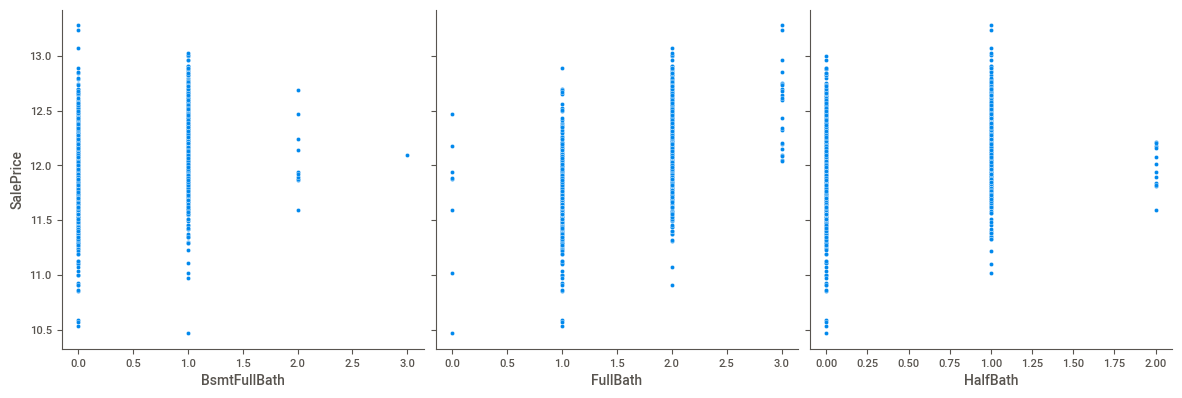

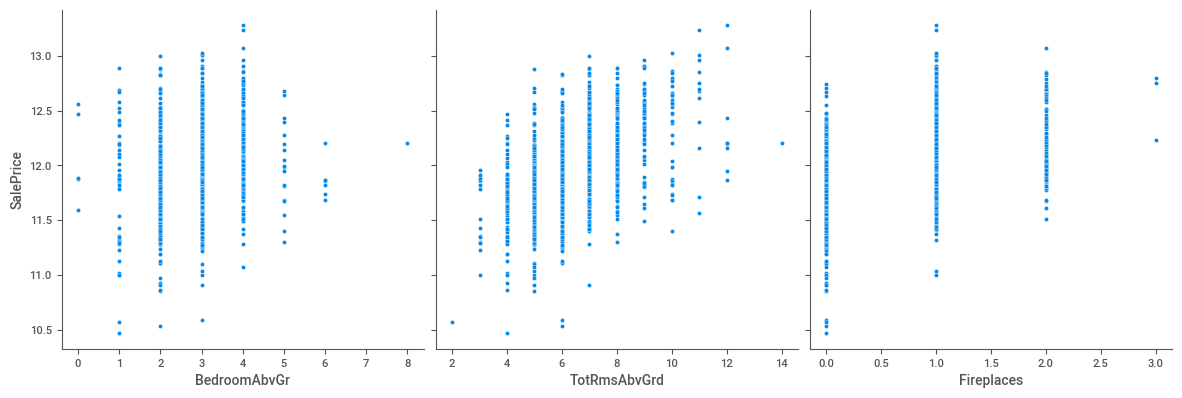

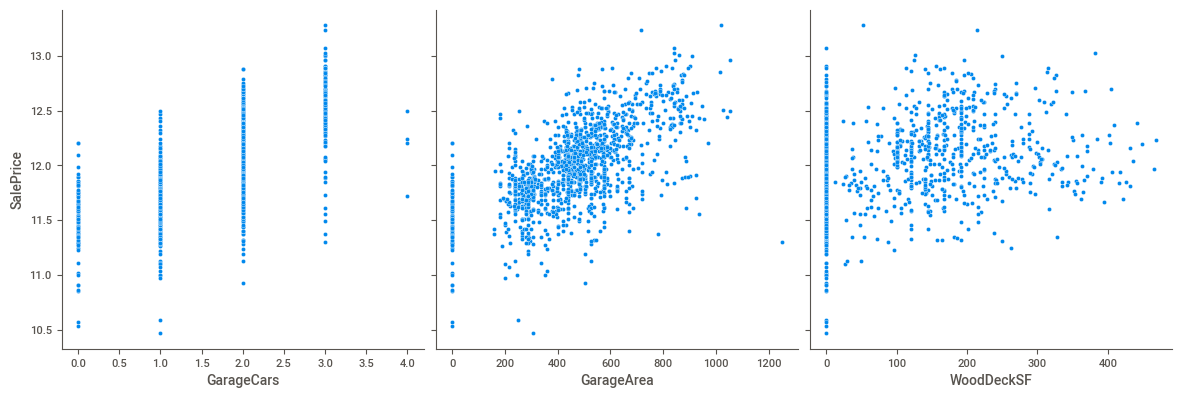

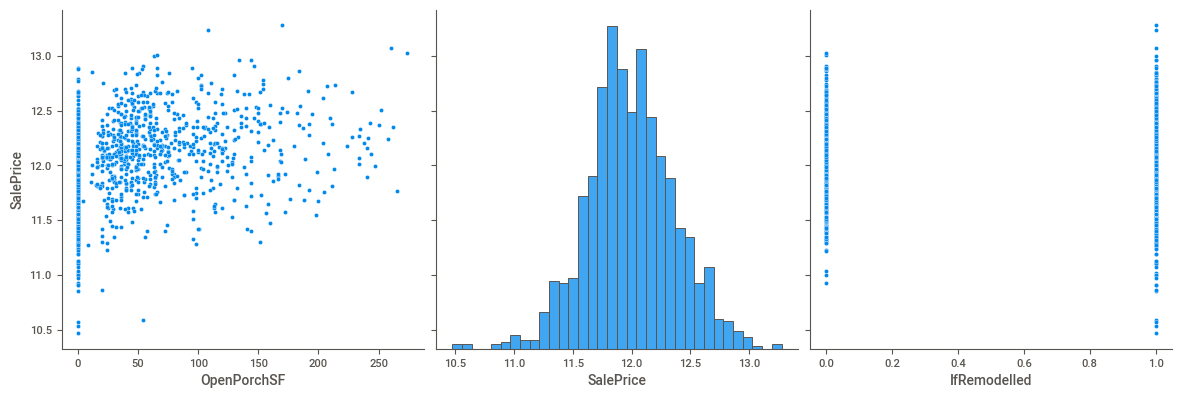

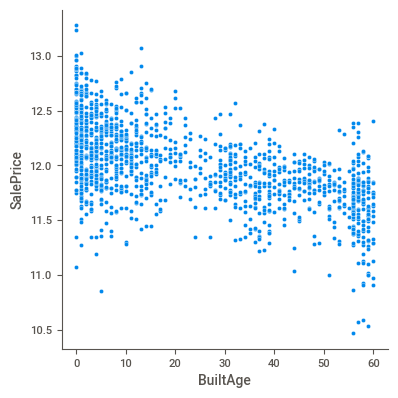

In [34]:
# Visualize the numerical values using pairplots with salesprice

plt.figure(figsize=(10,5))
sns.pairplot(housing_data, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['OpenPorchSF','SalePrice', 'IfRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housing_data, x_vars=['BuiltAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

##### Target variable 'sale Price' vs a few select columns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'ClearCr'),
  Text(19, 0, 'NPkVill'),
  Text(20, 0, 'StoneBr'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

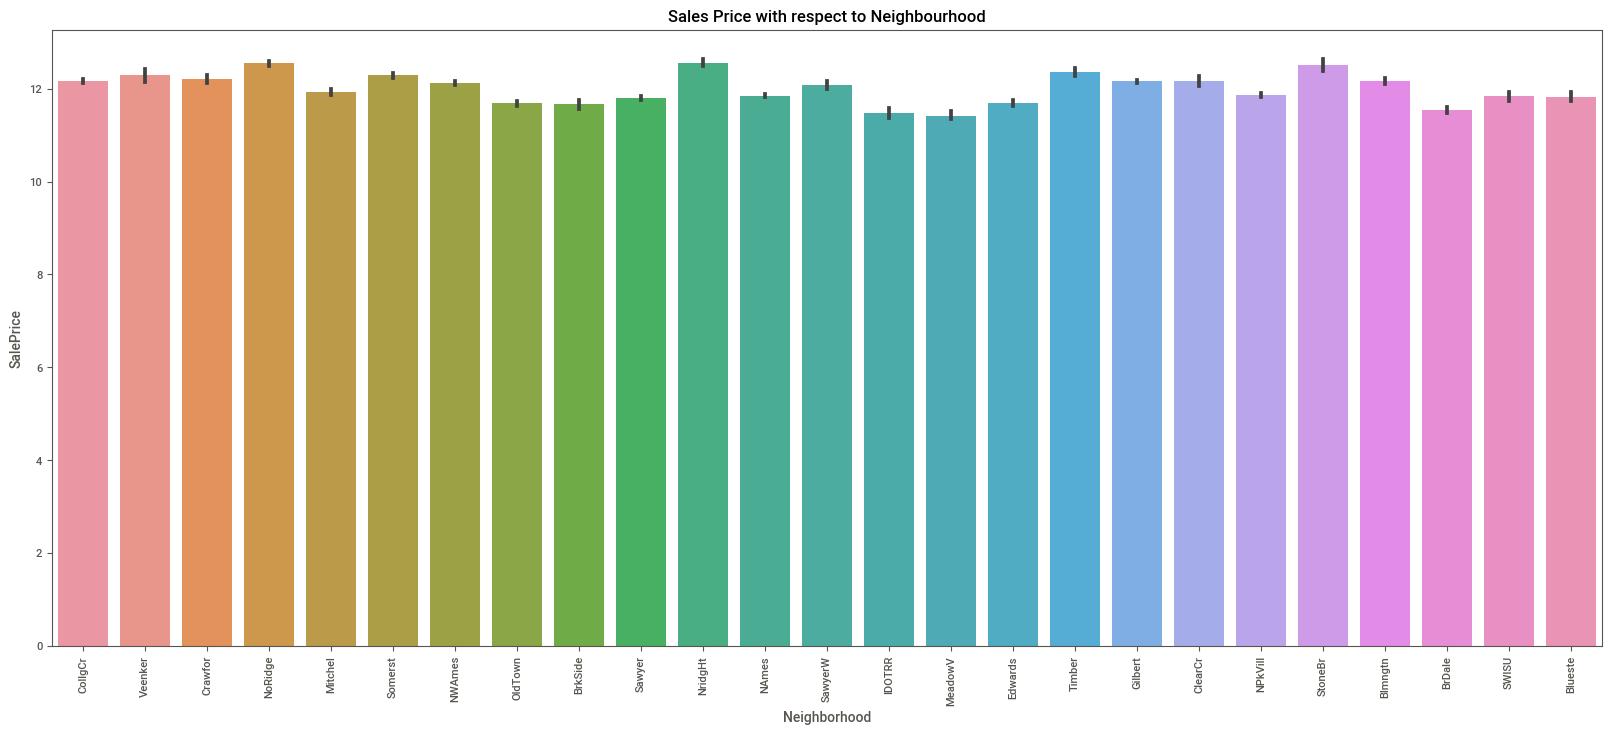

In [35]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= housing_data)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

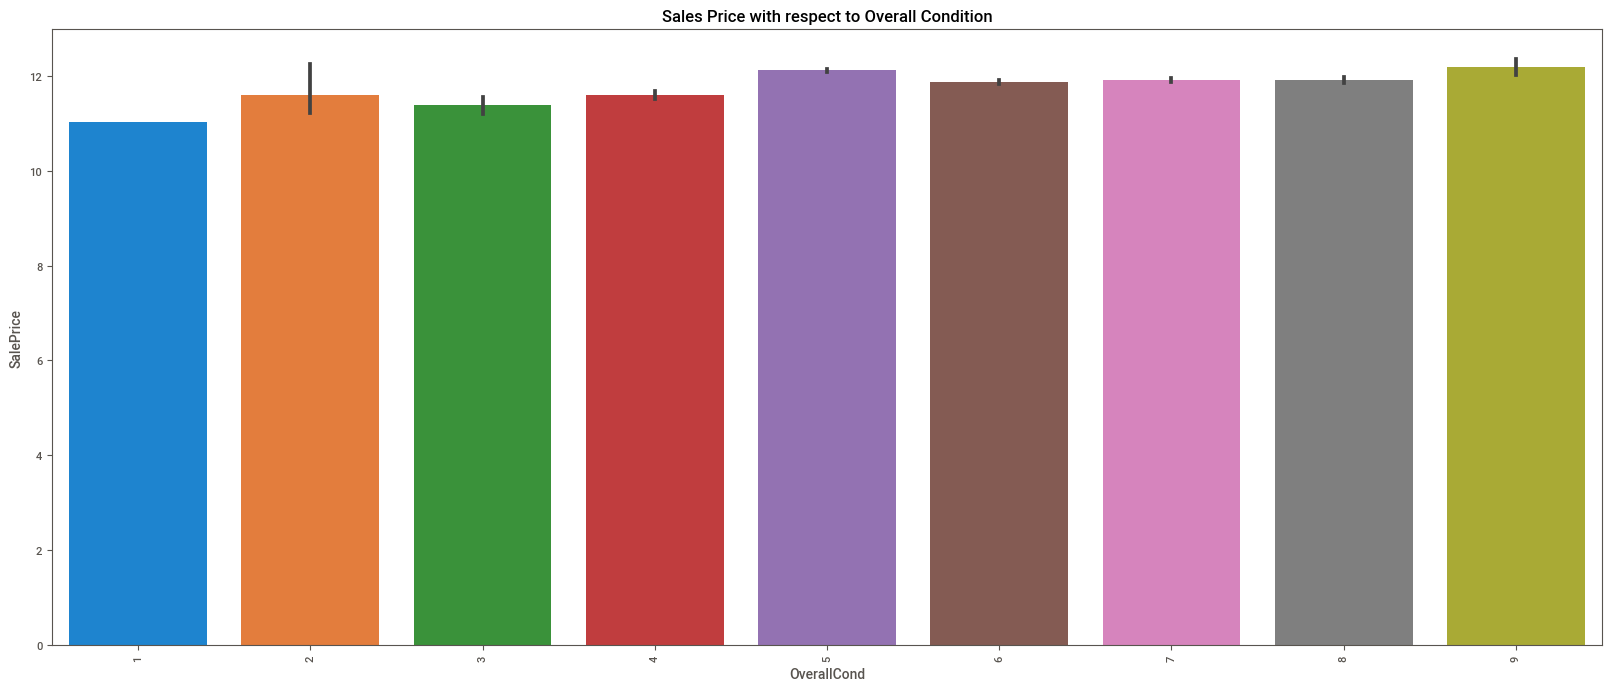

In [36]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= housing_data)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

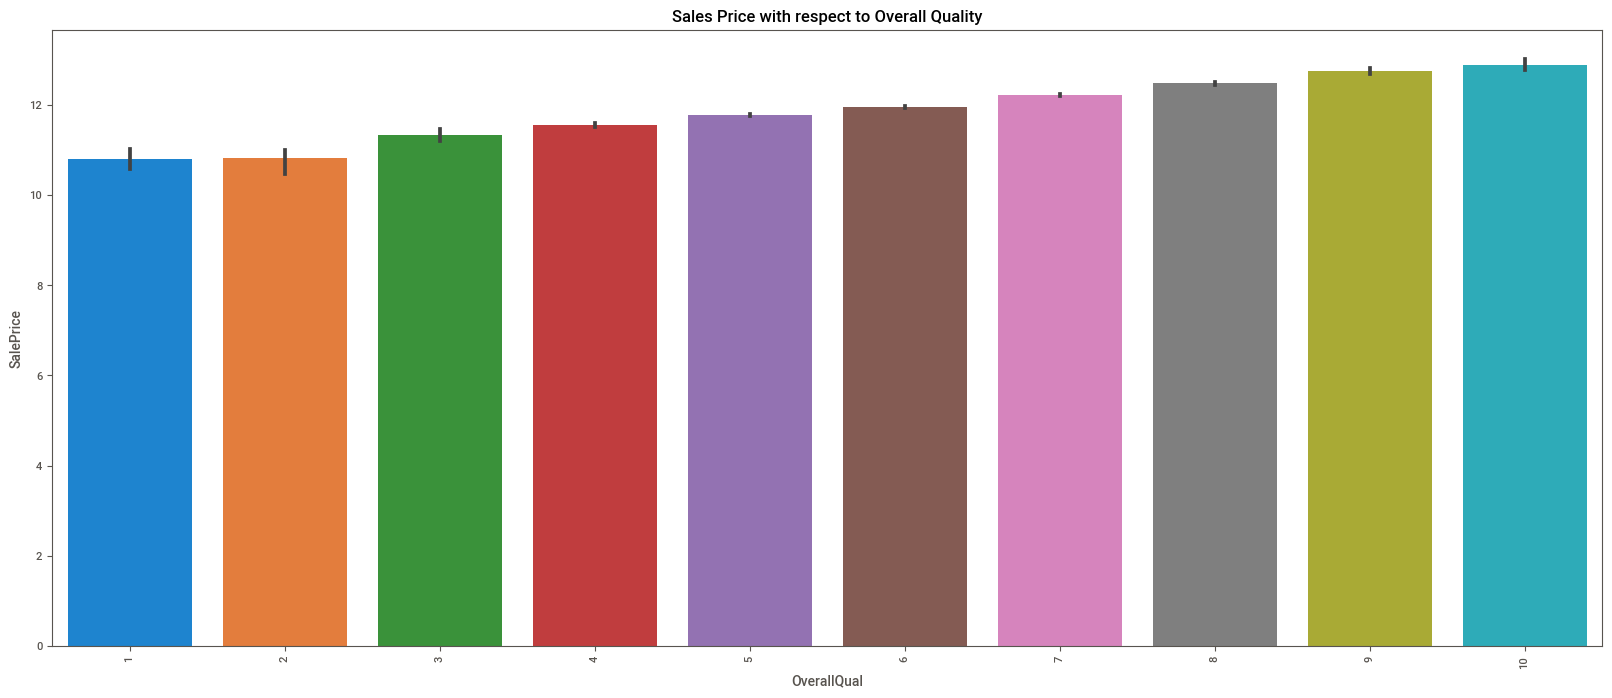

In [37]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= housing_data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

In [38]:
numeric_housing_data = housing_data.select_dtypes(include=['float64', 'int64'])

In [39]:
# correlation matrix
cor = numeric_housing_data.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,IfRemodelled,BuiltAge,OldOrNewGarage
MSSubClass,1.000000,-0.401931,-0.393699,0.060222,-0.059830,0.024548,-0.071873,-0.129118,-0.245604,-0.253736,...,-0.031299,-0.040892,-0.105249,-0.030496,0.004843,-0.011720,-0.059653,-0.047843,-0.048133,0.040748
LotFrontage,-0.401931,1.000000,0.570154,0.190775,-0.051785,0.162426,0.107511,0.141324,0.288790,0.344437,...,0.203051,0.272192,0.304673,0.079295,0.134818,0.025213,0.340837,-0.046754,-0.065145,0.078414
LotArea,-0.393699,0.570154,1.000000,0.171768,-0.005919,0.096369,0.142376,0.092427,0.287169,0.391483,...,0.308544,0.258948,0.296699,0.136089,0.133542,0.038810,0.380824,0.002721,-0.039391,-0.017580
OverallQual,0.060222,0.190775,0.171768,1.000000,-0.088590,0.366129,0.193002,0.285256,0.507715,0.429465,...,0.377691,0.586480,0.539509,0.219328,0.358891,0.085721,0.813190,-0.100826,-0.548074,0.563296
OverallCond,-0.059830,-0.051785,-0.005919,-0.088590,1.000000,-0.125851,-0.017521,-0.143153,-0.162739,-0.136004,...,-0.011391,-0.177895,-0.136103,0.003890,-0.055243,-0.011998,-0.024053,0.317140,-0.073388,-0.290144
MasVnrArea,0.024548,0.162426,0.096369,0.366129,-0.125851,1.000000,0.213629,0.086560,0.307658,0.299629,...,0.224874,0.336142,0.338542,0.123847,0.164114,0.024516,0.380392,-0.162473,-0.142217,0.165754
BsmtFinSF1,-0.071873,0.107511,0.142376,0.193002,-0.017521,0.213629,1.000000,-0.558481,0.427601,0.348825,...,0.204278,0.189729,0.230009,0.195079,0.064733,0.023795,0.352239,-0.126288,-0.121970,0.011541
BsmtUnfSF,-0.129118,0.141324,0.092427,0.285256,-0.143153,0.086560,-0.558481,1.000000,0.437582,0.311913,...,0.039859,0.204051,0.175354,-0.040374,0.137854,0.032361,0.203529,0.031564,-0.174480,0.335792
TotalBsmtSF,-0.245604,0.288790,0.287169,0.507715,-0.162739,0.307658,0.427601,0.437582,1.000000,0.770977,...,0.277055,0.421145,0.444024,0.202218,0.224610,0.051871,0.611669,-0.110048,-0.303012,0.329473
1stFlrSF,-0.253736,0.344437,0.391483,0.429465,-0.136004,0.299629,0.348825,0.311913,0.770977,1.000000,...,0.360585,0.419848,0.447568,0.188469,0.182961,0.063160,0.578984,-0.042623,-0.242892,0.217796


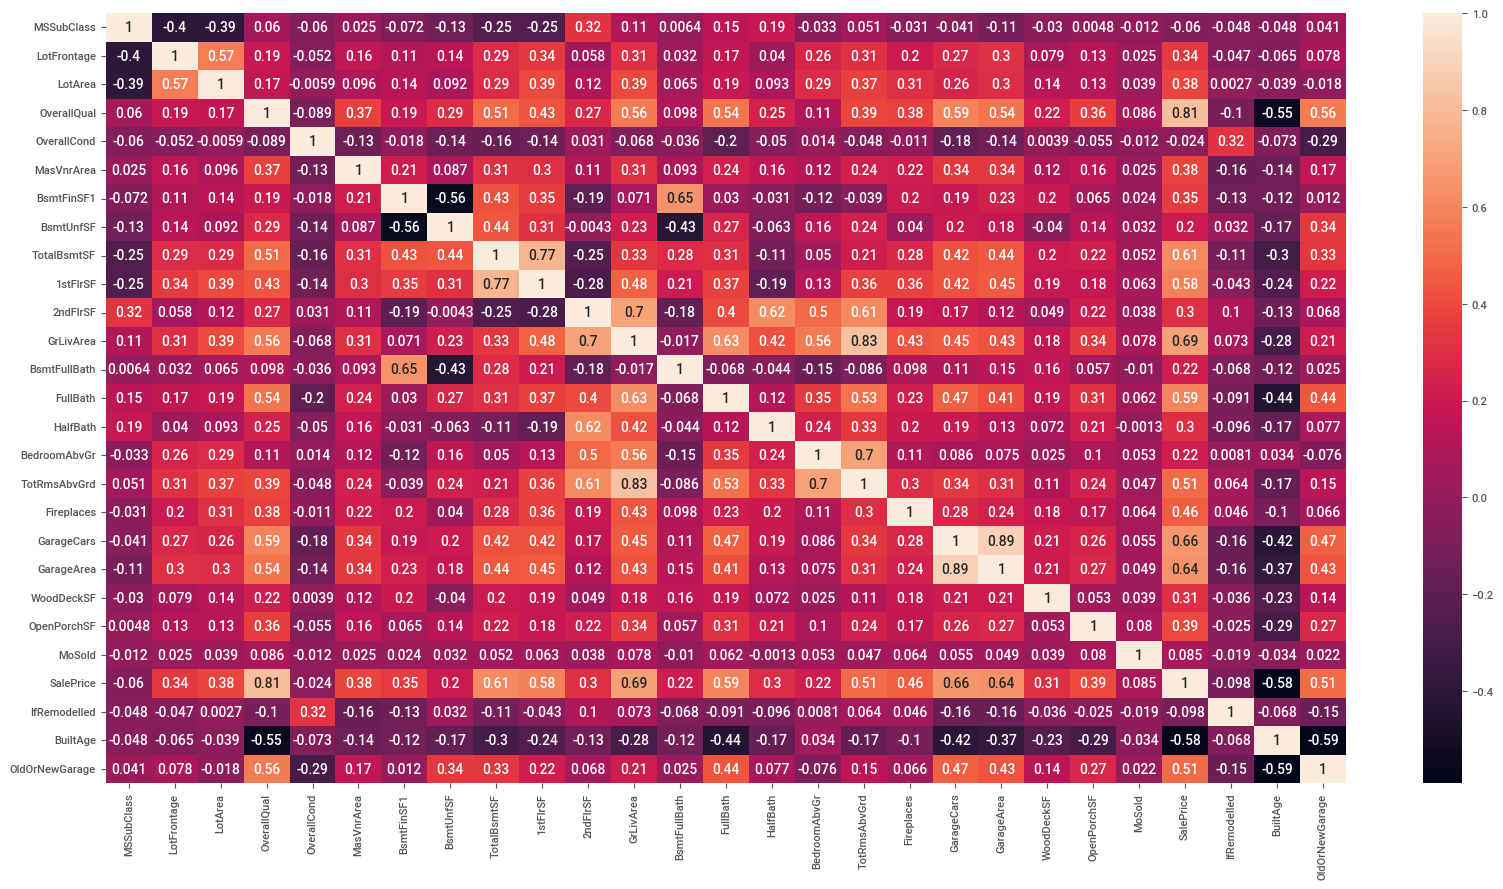

In [40]:
# Let's Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(numeric_housing_data.corr(), annot = True)
plt.show()

#### Removing following columns which shows high correlation
- TotRmsAbvGrd and GrLivArea show 82%
- Garage Area and Garage Cars show 88%

Hence dropping TotRmsAbvGrd and Garage Cars

In [41]:
housing_data.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [42]:
# check shape of the data now
housing_data.shape

(1358, 47)

## Data Preparation

- Converting categorical data into numercal data
- Creating Dummies

In [43]:
# Since the values of the following fields are in a ordered list, we assign values to them in sequence

# For values which can be ordered, provided an ordered sequence value and which cannot be ordered, categorised them into 0 and 1

housing_data['LotShape_n'] = housing_data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housing_data['ExterQual_n'] = housing_data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing_data['BsmtQual_n'] = housing_data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['BsmtExposure_n'] = housing_data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing_data['BsmtFinType1_n'] = housing_data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
housing_data['HeatingQC_n'] = housing_data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['KitchenQual_n'] = housing_data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['FireplaceQu_n'] = housing_data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing_data['GarageFinish_n'] = housing_data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing_data['BldgType_n'] = housing_data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0 })
housing_data['HouseStyle_n'] = housing_data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housing_data['Fence_n'] = housing_data['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housing_data['LotConfig_n'] = housing_data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 'None': 0  })
housing_data['MasVnrType_n'] = housing_data['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housing_data['SaleCondition_n'] = housing_data['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 'Alloca': 0, 'AdjLand': 0, 'None': 0})


housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,HeatingQC_n,KitchenQual_n,FireplaceQu_n,GarageFinish_n,BldgType_n,HouseStyle_n,Fence_n,LotConfig_n,MasVnrType_n,SaleCondition_n
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,5,4,3,2,1,4,0,2,1,1


In [44]:
# drop the old columns from which the new columns were derived

housing_data = housing_data.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
                                  'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,HeatingQC_n,KitchenQual_n,FireplaceQu_n,GarageFinish_n,BldgType_n,HouseStyle_n,Fence_n,LotConfig_n,MasVnrType_n,SaleCondition_n
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [45]:
# List of available columns
housing_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'Foundation', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageType', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice', 'IfRemodelled',
       'BuiltAge', 'OldOrNewGarage', 'LotShape_n', 'ExterQual_n', 'BsmtQual_n',
       'BsmtExposure_n', 'BsmtFinType1_n', 'HeatingQC_n', 'KitchenQual_n',
       'FireplaceQu_n', 'GarageFinish_n', 'BldgType_n', 'HouseStyle_n',
       'Fence_n', 'LotConfig_n', 'MasVnrType_n', 'SaleCondition_n'],
      dtype='object')

- Create dummies for columns


In [46]:
# Create dummies for MSZoning
MSZoning_d = pd.get_dummies(housing_data['MSZoning'], prefix='MSZoning', drop_first = True)
housing_data = pd.concat([housing_data, MSZoning_d], axis = 1)

# Create dummies for Neighborhood
Neighborhood_d = pd.get_dummies(housing_data['Neighborhood'], prefix='Neighborhood', drop_first = True)
housing_data = pd.concat([housing_data, Neighborhood_d], axis = 1)

# Create dummies for RoofStyle
RoofStyle_d = pd.get_dummies(housing_data['RoofStyle'], prefix='RoofStyle', drop_first = True)
housing_data = pd.concat([housing_data, RoofStyle_d], axis = 1)

# Create dummies for Exterior1st
Exterior1st_d = pd.get_dummies(housing_data['Exterior1st'], prefix='Exterior1st', drop_first = True)
housing_data = pd.concat([housing_data, Exterior1st_d], axis = 1)

# Create dummies for Exterior2nd
Exterior2nd_d = pd.get_dummies(housing_data['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housing_data = pd.concat([housing_data, Exterior2nd_d], axis = 1)

# Create dummies for Foundation
Foundation_d = pd.get_dummies(housing_data['Foundation'], prefix='Foundation', drop_first = True)
housing_data = pd.concat([housing_data, Foundation_d], axis = 1)

# Create dummies for GarageType
GarageType_d = pd.get_dummies(housing_data['GarageType'], prefix='GarageType', drop_first = True)
housing_data = pd.concat([housing_data, GarageType_d], axis = 1)

housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,True,False,False,False,True,False,False,False,False,False
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,False,False,False,False,True,False,False,False,False,False
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,True,False,False,False,True,False,False,False,False,False
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,False,False,False,False,False,False,False,False,True,False
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,True,False,False,False,True,False,False,False,False,False


In [47]:
# drop the original columns as new columns have been derived from these columns

housing_data = housing_data.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType'], axis=1)

housing_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,True,False,False,False,True,False,False,False,False,False
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,False,False,False,False,True,False,False,False,False,False
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,True,False,False,False,True,False,False,False,False,False
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,False,False,False,False,False,False,False,False,True,False
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,True,False,False,False,True,False,False,False,False,False


In [48]:
# check info
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1358 entries, 0 to 1458
Columns: 113 entries, MSSubClass to GarageType_None
dtypes: bool(73), float64(3), int64(37)
memory usage: 531.8 KB


## Create Train Test data Split

In [49]:
# Put feature variable to X
X = housing_data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,True,False,False,False,True,False,False,False,False,False
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,False,False,False,False,True,False,False,False,False,False
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,True,False,False,False,True,False,False,False,False,False
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,False,False,False,False,False,False,False,False,True,False
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,True,False,False,False,True,False,False,False,False,False


In [50]:
# Put response variable to y

y = housing_data['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Scale the features

In [51]:
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=112)

In [52]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [53]:
# Unregularized Model
from sklearn.linear_model import LinearRegression,Lasso, Ridge
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9285023673658995
Testing R2
0.8854230758544008


### Recursive feature elimination (RFE)¶
Since there are around 112 features, use RFE to get the best features out of these and use the new features for further analysis

In [54]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm)            
rfe = rfe.fit(X_train, y_train)

In [55]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,LotFrontage,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,1stFlrSF,True,1
6,2ndFlrSF,True,1
7,GrLivArea,True,1
8,BsmtFullBath,True,1
9,HalfBath,True,1


In [56]:
# Assign the columns to X_train_rfe

X_train_rfe = X_train[col]

In [57]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## Model Building and Evaluation

### RIDGE

In [58]:
# list of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#Generate a list of 50 values between 0 and 1.5
# params = {'alpha': np.linspace(0.2, 0.6 , num = 100) }

#generate Ridge
ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
# Get mean scores
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
14,3.0,-0.073125,-0.078802,1
13,2.0,-0.073094,-0.078804,2
15,4.0,-0.073159,-0.078821,3
12,1.0,-0.073080,-0.078826,4
11,0.9,-0.073082,-0.078829,5
10,0.8,-0.073084,-0.078832,6
9,0.7,-0.073087,-0.078835,7
16,5.0,-0.073195,-0.078837,8
8,0.6,-0.073090,-0.078839,9
7,0.5,-0.073095,-0.078843,10


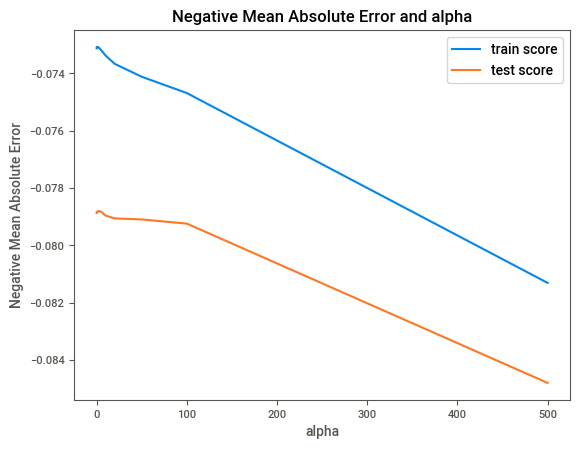

In [60]:
# plot mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')


plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()


In [61]:
# get the best estimator for lambda
ridge_model_cv.best_estimator_

Ridge(alpha=3.0)

In [62]:
# check the coefficient values with lambda = 3

alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.01149205,  0.0718634 ,  0.03786863,  0.02056243,  0.04217896,
        0.0131494 ,  0.01297409,  0.0971117 ,  0.01070469,  0.00834879,
        0.01409798,  0.03602508,  0.01064796,  0.0084977 , -0.01818965,
       -0.02724189,  0.01606485,  0.01390722,  0.01466031,  0.00929226,
        0.01497917,  0.01674303,  0.01011062, -0.02455921, -0.00730268,
        0.01732488,  0.0701831 ,  0.0275481 ,  0.11681725,  0.08598901,
        0.02048675, -0.00862507, -0.01406584,  0.00686473,  0.02346828,
       -0.01927312,  0.01279201,  0.01214179, -0.00182581, -0.00967221,
        0.01414357, -0.01504148, -0.01681488, -0.00182581,  0.0116232 ,
       -0.00660428, -0.01276517,  0.00643183, -0.00985975,  0.01804569,
        0.03772039,  0.01329821,  0.00826553,  0.01086766,  0.00736474,
       -0.01194401])

In [63]:
# Check the mean squared error
mean_squared_error(y_test, ridge.predict(X_test))

0.01616265145889161

In [64]:
# Keep the Features and coefficienst in a dataframe
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotFrontage,0.0115
1,OverallQual,0.0719
2,OverallCond,0.0379
3,BsmtFinSF1,0.0206
4,TotalBsmtSF,0.0422
5,1stFlrSF,0.0131
6,2ndFlrSF,0.0130
7,GrLivArea,0.0971
8,BsmtFullBath,0.0107
9,HalfBath,0.0083


In [65]:
# Assign the Features and their coefficient values to a dictionary to plot the bar plot
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'LotFrontage': 0.0115,
 'OverallQual': 0.0719,
 'OverallCond': 0.0379,
 'BsmtFinSF1': 0.0206,
 'TotalBsmtSF': 0.0422,
 '1stFlrSF': 0.0131,
 '2ndFlrSF': 0.013,
 'GrLivArea': 0.0971,
 'BsmtFullBath': 0.0107,
 'HalfBath': 0.0083,
 'Fireplaces': 0.0141,
 'GarageCars': 0.036,
 'WoodDeckSF': 0.0106,
 'OpenPorchSF': 0.0085,
 'IfRemodelled': -0.0182,
 'BuiltAge': -0.0272,
 'OldOrNewGarage': 0.0161,
 'BsmtQual_n': 0.0139,
 'BsmtExposure_n': 0.0147,
 'BsmtFinType1_n': 0.0093,
 'HeatingQC_n': 0.015,
 'KitchenQual_n': 0.0167,
 'GarageFinish_n': 0.0101,
 'BldgType_n': -0.0246,
 'LotConfig_n': -0.0073,
 'SaleCondition_n': 0.0173,
 'MSZoning_FV': 0.0702,
 'MSZoning_RH': 0.0275,
 'MSZoning_RL': 0.1168,
 'MSZoning_RM': 0.086,
 'Neighborhood_Crawfor': 0.0205,
 'Neighborhood_Edwards': -0.0086,
 'Neighborhood_MeadowV': -0.0141,
 'Neighborhood_NoRidge': 0.0069,
 'Neighborhood_NridgHt': 0.0235,
 'Neighborhood_OldTown': -0.0193,
 'Neighborhood_StoneBr': 0.0128,
 'Exterior1st_BrkFace': 0.0121,
 'Exterior1st_

### RFE

In [66]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm)            
rfe = rfe.fit(X_train_ridge, y_train)

In [67]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
17,MSZoning_RL,True,1,0.1168
4,GrLivArea,True,1,0.0971
18,MSZoning_RM,True,1,0.0860
0,OverallQual,True,1,0.0719
15,MSZoning_FV,True,1,0.0702
3,TotalBsmtSF,True,1,0.0422
1,OverallCond,True,1,0.0379
25,Foundation_PConc,True,1,0.0377
6,GarageCars,True,1,0.0360
16,MSZoning_RH,True,1,0.0275


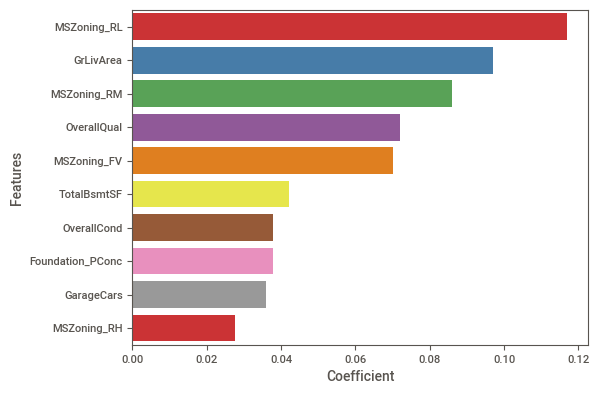

In [68]:
# bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

### LASSO

In [69]:
#Create Lasso
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
# mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.073099,-0.078838,1
1,0.0002,-0.073152,-0.078870,2
2,0.0003,-0.073224,-0.078921,3
3,0.0004,-0.073311,-0.078995,4
4,0.0005,-0.073415,-0.079079,5
5,0.001,-0.074202,-0.079874,6
6,0.002,-0.075115,-0.080337,7
7,0.003,-0.075731,-0.080654,8
8,0.004,-0.076417,-0.081070,9
9,0.005,-0.077128,-0.081684,10


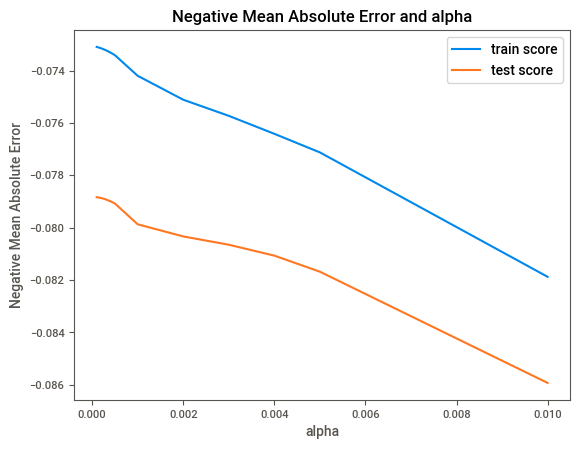

In [71]:
# plot mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [72]:
# get the best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001)

In [73]:
# check the coefficient values with lambda = 0.0004
alpha = 0.0001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.01159658,  0.07188934,  0.03741828,  0.02044644,  0.04247229,
        0.        , -0.00244125,  0.11437346,  0.01083613,  0.00806131,
        0.01395796,  0.03660565,  0.01054054,  0.00841851, -0.017784  ,
       -0.02704734,  0.01598443,  0.01373825,  0.01495736,  0.0090957 ,
        0.01487381,  0.01666157,  0.01040411, -0.02463121, -0.00723339,
        0.01672523,  0.0788755 ,  0.03178157,  0.13405457,  0.10108952,
        0.02028969, -0.00863645, -0.01398424,  0.00674055,  0.02350883,
       -0.01945824,  0.01275698,  0.01216655, -0.00316096, -0.00395939,
        0.01458761, -0.01511253, -0.01634543, -0.00044876,  0.00593979,
       -0.00662489, -0.01310501,  0.00582915, -0.00995071,  0.01851259,
        0.03804589,  0.01327347,  0.00941752,  0.01061642,  0.00710895,
       -0.01195708])

In [74]:
# Check the mean squared error
mean_squared_error(y_test, lasso.predict(X_test))

0.0161519859345236

In [75]:
# Put the shortlisted Features and coefficienst in a dataframe
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df


,Features,Coefficient
0,LotFrontage,0.0116
1,OverallQual,0.0719
2,OverallCond,0.0374
3,BsmtFinSF1,0.0204
4,TotalBsmtSF,0.0425
5,2ndFlrSF,-0.0024
6,GrLivArea,0.1144
7,BsmtFullBath,0.0108
8,HalfBath,0.0081
9,Fireplaces,0.0140


In [76]:
# Put the Features and Coefficients in dictionary
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict


{'LotFrontage': 0.01159657760653695,
 'OverallQual': 0.0718893358059618,
 'OverallCond': 0.037418283430938754,
 'BsmtFinSF1': 0.020446435569130426,
 'TotalBsmtSF': 0.04247228919387729,
 '1stFlrSF': 0.0,
 '2ndFlrSF': -0.0024412517057071886,
 'GrLivArea': 0.1143734563319301,
 'BsmtFullBath': 0.010836129416568061,
 'HalfBath': 0.008061314499862571,
 'Fireplaces': 0.013957955477377028,
 'GarageCars': 0.03660565475528457,
 'WoodDeckSF': 0.010540536996009629,
 'OpenPorchSF': 0.00841850515533225,
 'IfRemodelled': -0.01778400020212981,
 'BuiltAge': -0.027047336307053804,
 'OldOrNewGarage': 0.015984428864390797,
 'BsmtQual_n': 0.013738250276202697,
 'BsmtExposure_n': 0.014957361685883021,
 'BsmtFinType1_n': 0.00909570189845163,
 'HeatingQC_n': 0.01487380727007366,
 'KitchenQual_n': 0.016661570832877913,
 'GarageFinish_n': 0.010404107681637667,
 'BldgType_n': -0.024631211446547386,
 'LotConfig_n': -0.007233394960564497,
 'SaleCondition_n': 0.01672523362711755,
 'MSZoning_FV': 0.07887550080511316

### RFE

In [77]:
# Do an RFE to minimise the features
X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE
rfe = RFE(lm)            
rfe = rfe.fit(X_train_lasso, y_train)


In [78]:
 # Get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
18,MSZoning_RL,True,1,0.134055
4,GrLivArea,True,1,0.114373
19,MSZoning_RM,True,1,0.101090
16,MSZoning_FV,True,1,0.078876
0,OverallQual,True,1,0.071889
3,TotalBsmtSF,True,1,0.042472
25,Foundation_PConc,True,1,0.038046
1,OverallCond,True,1,0.037418
6,GarageCars,True,1,0.036606
17,MSZoning_RH,True,1,0.031782


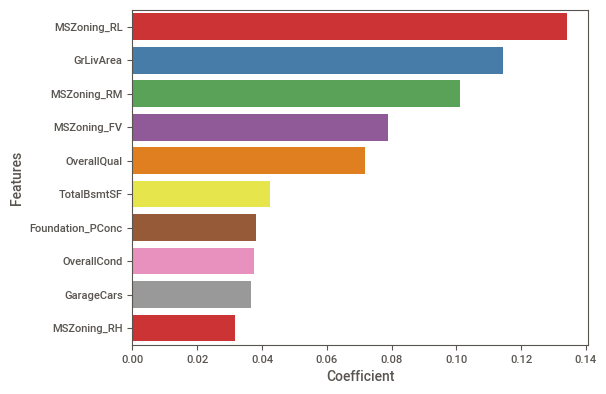

In [79]:
# bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

The graph displays the top variables based on the Lasso Regression model that are significant for thr prediction of the house price.

#### Conclusion :
The optimal lambda value in case of Ridge and Lasso is as below:
- Ridge - 3
- Lasso - 0.0001


The Mean Squared error in case of Ridge and Lasso are:
- Ridge - 0.016162
- Lasso - 0.016151


The Mean Squared Error of Lasso is slightly lower than that of Ridge

As Lasso helps in feature reduction (like coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

Hence based on Lasso, the factors that generally affect the price are the **Zoning classification, Living area square feet, Overall quality and condition of the house, Foundation type of the house, Number of cars that can be accomodated in the garage, Total basement area in square feet and the Basement finished square feet area**

The variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.